# Comparación a través de performance de algoritmos de búsqueda



### Paula Campaña Donoso (00215572)
### Juan Francisco Cisneros (00323665)
### Randall Mencias (00321469)
### Juan Diego Venegas (00209856)



#### NRC: 2075

## Descripción:
Para nuestro proyecto la idea sería implementar la función command F o control F que existe en los editores de texto de hoy en día. Para esto, programaríamos y compararíamos diferentes algoritmos de busqueda y encontraríamos cual de todos es el más eficiente, el mismo se utilizaría para la implementación del programa. Utilizaríamos un documento en terminación TXT para que los algoritmos puedan leer este bloque de texto y encuentre así la palabra que se pida buscar.

## Temas que aplican a estructuras de datos y algoritmos:
Para esta idea de proyecto se utilizarán los siguientes temas:
- Linear Search: este algoritmo de busqueda fue enseñado en clase y es un algoritmo de búsqueda de fuerza bruta, lo que utilizaríamos como base para comparar con otros algoritmos.
- Boyer-Moore Search
- KMP
- Rabin Karp Algorithm
- Decorador de runtime para medir la eficiencia de cada algoritmo (runtime y uso de memoria)


In [14]:
import time
def timer_func(func):
    # This function shows the execution time of
    # the function object passed
    def wrap_func(*args, **kwargs):
        t1 = time.time()*10**12
        result = func(*args, **kwargs)
        t2 = time.time()*10**12
        return result , t2-t1
    return wrap_func

In [15]:
wordSearchList = ['dui','aliquam','habitant','neque','nunc','commodo','libero','nulla','sapien','suscipit','viverra','mauris','nibh','nisi','nisl','nunc','odio','orci','ornare','pellentesque','pharetra','placerat','porta','porttitor','posuere','potenti','praesent','pretium','proin','pulvinar','purus','quam','quis','quisque','rhoncus','risus','rutrum','sagittis','sapien','scelerisque','sed','sem','semper','senectus','sit','sociis','sociosqu','sodales','sollicitudin','suscipit','suspendisse','taciti','tellus','tempor','tempus','tincidunt','torquent','tortor','tristique','turpis','ullamcorper','ultrices','ultricies','urna','ut','varius','vehicula','vel','velit','venenatis','vestibulum','vitae','vivamus','viverra','volutpat','vulputate']

# LEYENDO EL TXT CON EL TEXTO

In [16]:
with open('huge_txt_example.txt', 'r') as file:
    data = file.read()

#data to lowercase
data = data.lower()
document = data.split(" ")

### LINEAR SEARCH ALGORITHM

La funcion de busqueda de Linear Search busca la palabra que se le indica como manera directa, a lo que se refiere con esto es que busca palabras que sean iguales a la que se registro como opcion de busqueda. Para esto en el texto se establece una variable wordFind, ademas se inicializa un arreglo llamado posicion donde guardara la posicion dentro del texto de la palabra que se busco previamente en el texto. Luego se hace un lazo for que recorre todo el texto y busca la palabra que se le indico, si la encuentra la agrega al arreglo posicion y si no la encuentra no hace nada. Ademas dentro del lazo for se encuentra un if, este if me permite agregar al arreglo posicion las posiciones de palabras que sean iguales, es decir, si busca en mi texto la palabra "decir" y esta palabra se repite varias veces, entonces todas esas posiciones se guardan en el arreglo posicion. Al final de la funcion se retorna el arreglo posicion que contiene las posiciones de la palabra que se busco en el texto. Tambien se utiliza un decorador de tiempo para calcular el tiempo de ejecución de la funcion Linear Search. Para guardar todos estos tiempos cree un arreglo llamado runtimeLinearSearch donde se guardan los tiempos de ejecución de la funcion Linear Search.

In [17]:
@timer_func
def Linear_search(text, wordFind):
    positions = []
    for i in range(len(text)):
        if text[i:i+len(wordFind)] == wordFind:
            positions.append(i)

    return positions

La complejidad de mi funcion Linear Search es O(n) ya que recorre todo el texto para buscar la palabra que se le indico. El mejor caso seria que encontrara la palabra en la posicion inicial, sin embargo, como es un texto largo la palabra puede repetirse lo que hace que la funcion Linear Search si sea de complejidad O(n). Por ultimo el uso de memoria de mi funcion Linear Search es O(1) ya que no se crea ninguna variable nueva, solo se utiliza la variable wordFind y el arreglo posicion, que me permite encontrar la posicion de la palabra que se busco en el texto.

Time complexity: O(n)
Memory Space: O(1)

### RABIN KARP ALGORITHM

El algoritmo RK es un algoritmo de comparacion que consiste en recorrer el texto comparando el valor hash de una subcadena de texto especifica con el valor del hash de la cadena que se esta buscando (patron).

Digamos que se tiene el siguiente texto:
        $$ A\ B\  C\  D\  E\  E\  F\  G\  H\  I $$
y se quiere buscar $$E\  F$$
El algoritmo consiste en crear un window del mismo tamaño de la cadena que se quiere buscar, en este caso seria un window de 2.\
Se calcula el valor hash de el patron y de lo que se encuentre en la window, se compara el valor y en caso de que este sea diferente mueve a la window a la siguiente subcadena.\
Si se encuentra una situacion donde el valor hash de la subcadena en la window es igual al valor hash del patron, se compara caracter por caracter la subcadena con el patron hasta verificar que sea la  misma palabra.
$$ $$
Se puede dar el caso en que el valor hash del contenido de la window sea igual al valor hash del patron, pero las palabras no coinciden. Este tipo de situaciones incrementan la complejidad del algoritmo
Para reducir la ocurrencia de esto, se usa el modulo de un numero primo

In [18]:
d = 256
@timer_func
def RKAlgorithm(txt, palabra):
	#array = []
	M = len(palabra)
	N = len(txt)
	q = 101
	hashPattern = 0
	hashText = 0
	h = 1
	for i in range(M - 1):
		h = (h * d) % q

	for i in range(M):  #hash de palabra y primera window
		hashPattern = (d * hashPattern + ord(palabra[i])) % q
		hashText = (d * hashText + ord(txt[i])) % q

	for i in range(N - M + 1):  #recorrer el texto
		if hashPattern == hashText:  #si tienen el mismo hash
			for j in range(M):  #comparacion caracter por caracter del substring en la window con la palabra
				if txt[i + j] != palabra[j]:
					break
				else:
					j += 1
		#if j == M:
		#   array.append(i)

		if i < N - M:  #hash de la siguiente ventana
			hashText = (d * (hashText - ord(txt[i]) * h) + ord(txt[i + M])) % q

#print(array)

El peor caso O(nm) se da cuando el valor hash de cada substring en la window es igual al hash de la palabra que se esta buscando $$ txt= AAAAAAAAA$$ $$ palabra = AA $$
El mejor caso, y el mas comun, es O(n+m), pues al encontrar dos hash iguales debe comparar la subsitring de la window con la de la palabra.

### KMP SEARCH ALGORITHM

El KMP o Algoritmo de Knuth-Morris-Pratt se especializa en buscar patrones de caracteres basandose en fallos previos. Para cuantificar previos fallos utiliza lo que se llama una lista de mas largo patron

Suffix Array crea esta lista utilizando el patron a buscar, la longitud del patron y un array para almacenar el resultado

De manera mas facil busca patrones a evitar dentro de la busqueda

La creacion de la tabla tiene un tiempo de cracion dependiente al patron que se le entrega, como el patron que se le entrega siempre sera menor que la longitud del texto esta tiene una complejidad de $O(M)$, la tabla de igual manera ocupara un espacio de $O(M)$ ya que esta se llena siempre con la misma longitud que el patron de busqueda

In [19]:
def SuffixArray(search, M, suffix):
	'''
	:param search: Pattern to search
	:param M: Length of Pattern
	:param suffix: Empty array with M size
	:return:
	Fills suffix with pattern
	'''
	len = 0
	suffix[0] = 0 # M size of memory
	i = 1

	while i < M: #modifies list until M
		if search[i] == search[len]: #if i and i+1 are the same everything becomes +1
			#Compares the pattern between position [i] and [i+1]
			len += 1
			suffix[i] = len
			i += 1
		else:
			if len != 0: #compares in case there is a previous pattern
				len = suffix[len - 1]
			else:
				suffix[i] = 0 #fills the place with 0
				i += 1 #continues to transverse list

In [20]:
@timer_func
def KMPSearch(search, txt):
	'''
	:param search: pattern to search
	:param txt: Text to search
	:return: Index at which to return
	'''
	M = len(search)
	j = 0  # index for search
	index = []

	N = len(txt)
	i = 0  # index for txt

	suffix = [0] * M

	#Creates the comparison array
	SuffixArray(search, M, suffix)

	while (N - i) >= (M - j):  #tranverses the whole text but skipping through repeated patterns
		if search[j] == txt[i]:  #brute force
			i += 1
			j += 1

		if j == M:  #case for when pattern reachs its end
			index.append(i - j)  #saves placement
			j = suffix[j - 1]  #returns to second to last element

		# mismatch after j matches, returns to previous pattern
		elif i < N and search[j] != txt[i]:
			if j != 0:
				j = suffix[j - 1]
			else:
				i += 1
	#print("Word found at: ", index)

KMP search es utilizado para buscar un patron dentro de un texto, en su peor escenario este tendra que recorrer todo el texto sin encontrar un patron por lo que tendra de complejidad $O(n)$

Como el KMP utiliza ambos algoritmos para devolver un resultado se puede considerar que su complejidad se adhiere a la suma de ambas complejidades tambien descrito como $O(NM)$, en cuanto a su espacio esta solo usa la memoria de la lista de prefijos (en este codigo se utiliza un array para almacenar las respuestas pero esto no es parte del algoritmo mas solo una conveniencia), por lo que su complejidad de momoria igual resulta en $O(M)$

El algoritmo de KMP esta escrito bajo la idea de la busqueda de patrones, esto significa que para busqueda de palabras es un algoritmo poco efieciente tanto en espacio como en tiempo al compararce contra el metodo de fuerza bruta. Sin embargo si este fuera utilizado para la busqueda de frases repetitivas ganaria mucho tiempo. Ademas la idea del KMP es la base de varios otros metodos de busqueda en el Algoritmo de Booth.

En otras palabras el algoritmo de KMP no es un buen algoritmo de busquedas para textos reales pero su concepto puede ser expandido y mejorado en otros metodos de busqueda mas eficientes


### BOYER-MOORE STRING SEARCH ALGORITHM

La cadena-algoritmo de búsqueda de Boyer-Moore es un eficiente algoritmo de búsqueda de caracteres. Fue desarrollado por Robert S. Boyer y J Strother Moore en 1977.  El algoritmo preprocesa la cadena que se busca (el patrón), pero no la cadena en la que se busca (el texto). Por lo tanto, es adecuado para aplicaciones en las que el patrón es mucho más corto que el texto o donde persiste en múltiples búsquedas. En general, el algoritmo se ejecuta más rápido a medida que aumenta la longitud del patrón. Las características clave del algoritmo son hacer coincidir la cola del patrón en lugar de la cabeza, y saltar a lo largo del texto en saltos de varios caracteres en lugar de buscar todos los caracteres del texto. Tal como se muestra en el siguiente gif:


![SegmentLocal](boyerMoore.gif)

El algoritmo de Boyer-Moore busca apariciones de P en T realizando comparaciones explícitas de caracteres en diferentes alineaciones. El algoritmo comienza en la alineación k=n, Por lo que el inicio de P está alineado con el inicio de T . Los caracteres en P y T se comparan entonces comenzando en el índice n en P y K en T , se mueve hacia atrás. Las comparaciones continúan hasta que se alcanza el comienzo de P (lo que significa que hay una coincidencia) o se produce una falta de coincidencia en la que la alineación se desplaza hacia adelante (hacia la derecha) de acuerdo con el valor máximo permitido por una serie de reglas. Las comparaciones se realizan de nuevo en la nueva alineación y el proceso se repite hasta que la alineación se desplaza más allá del final de T


In [21]:
NO_OF_CHARS = 256

def badCharHeuristic(string, size):
	badChar = [-1]*NO_OF_CHARS

	for i in range(size):
		badChar[ord(string[i])] = i;

	return badChar

@timer_func
def boyer_moore_search(txt, pat):

	patternFound = []

	m = len(pat)
	n = len(txt)

	badChar = badCharHeuristic(pat, m)

	s = 0
	while(s <= n-m):
		j = m-1

		while j>=0 and pat[j] == txt[s+j]:
			j -= 1

		if j<0:
			#print("Pattern occur at shift = {}".format(s))
			patternFound.append(s)
			s += (m-badChar[ord(txt[s+m])] if s+m<n else 1)
		else:
			s += max(1, j-badChar[ord(txt[s+j])])


	return patternFound

El algoritmo de Boyer Moore puede tardar O(mn) de tiempo en el peor de los casos. El peor caso ocurre cuando todos los caracteres del texto y el patrón son iguales. Por ejemplo, txt[] = “AAAAAAAAAAAAAAAAAA” y pat[] = “AAAAA”. El mejor caso ocurre cuando todos los caracteres del texto y el patrón son diferentes.

Time Complexity : O(n x m)

Memory Space: O(1)


El algoritmo como podemos ver es muy eficiente en el tiempo de ejecución, pero no es el mejor algoritmo para encontrar patrones en un texto, ya que no es capaz de encontrar patrones que se repiten en el texto, por ejemplo, si buscamos el patrón "aliquam" en el texto, el algoritmo no es capaz de encontrar el patrón "aliquam aliquam" ya que no es capaz de encontrar patrones que se repiten en el texto.

In [22]:
runtimeLinearSearch = []
runtimeBOYER = []
runtimeRabinKarp = []
runtimeKMPSearch = []
for i in wordSearchList:
	#print('Searching for: ',i)
	searchBoyer = boyer_moore_search(data,i)
	searchLinear = Linear_search(data,i)
	searchRabinKarp = RKAlgorithm(data,i)
	searchKMPSearch = KMPSearch(i,data)
	runtimeBOYER.append(searchBoyer[1])
	runtimeLinearSearch.append(searchLinear[1])
	runtimeRabinKarp.append(searchRabinKarp[1])
	runtimeKMPSearch.append(searchKMPSearch[1])

<AxesSubplot: title={'center': 'Comparison between different search algorithms'}>

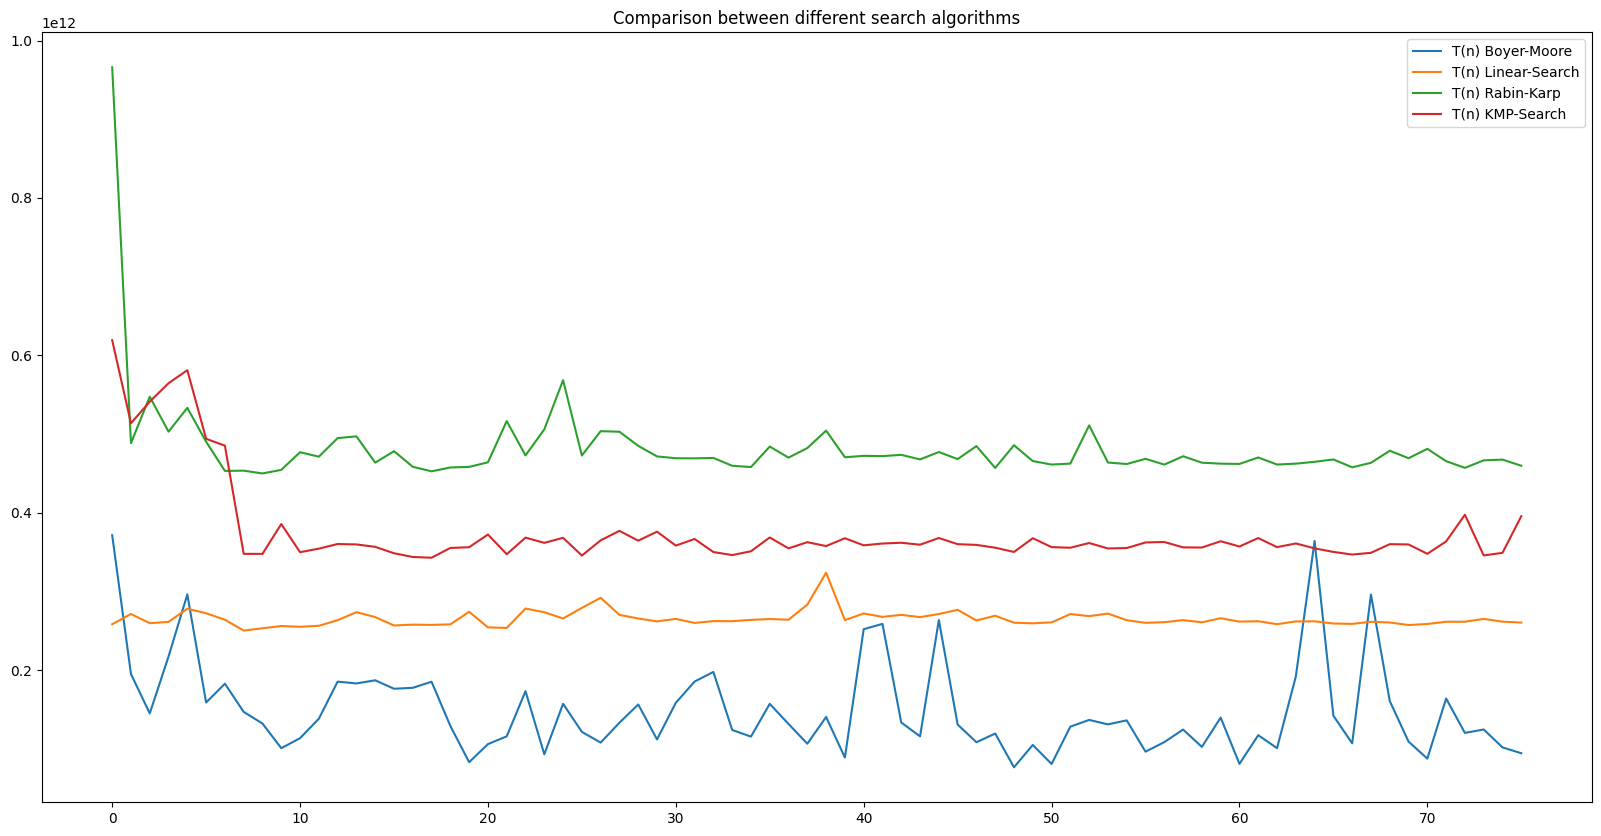

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(zip(runtimeBOYER,runtimeLinearSearch,runtimeRabinKarp,runtimeKMPSearch))
df.columns = ['T(n) Boyer-Moore', 'T(n) Linear-Search', 'T(n) Rabin-Karp', 'T(n) KMP-Search']
df
df.plot(figsize=(20,10), title='Comparison between different search algorithms')

### CONCLUSIONES

Para este proyecto lo que se decidió hacer fue investigar diferentes algoritmos de busqueda y compararlos entre si, el algoritmo base que utilizamos de comparación fue el de fuerza bruta llamado Linear Search, este algoritmo tiene una complejidad de O(n), lo que indica que es lineal. Este tipo de algoritmo lo que hace es buscar la palabra que se le indica a lo largo de todo el texto, por lo que tiene que escribirse la palabra exacta para que esta puede ser encontrada, por lo que muestra que no es tan eficiente. Una vez terminado la comparación de los diferentes algoritmos de búsqueda de patrones, podemos concluir que el algoritmo de búsqueda de patrones de Boyer-Moore es el más eficiente en términos de tiempo de ejecución, ya que es capaz de encontrar patrones en un texto en un tiempo de ejecución de O(n x m), siendo n el tamaño del texto y m el tamaño del patrón. Los otros algoritmos de busqueda como por ejemplo el algoritmo de Rabin Karp y el algoritmo KMP, son capaces de encontrar patrones en un texto en un tiempo de ejecución de O(n x m), lo cual indica que tiene la misma complejidad que el Boyer-Moore, sin embargo, esto no quiere decir que sean igual de eficientes, debido a que Boyer-Moore va revisando en todo el texto que cada letra coincida con la palabra que se está buscando desde el final hasta el inicio y si no coincide continua buscando así por todo el texto. Por el otro lado el algoritmo Rabin Karp busca la comparación de valor de Hash de una subcadena y así a lo largo de todo el texto. Por último el algoritmo de KMP busca las palabras utilizando un sistema de patrones, buscando así los mismos patrones en el texto, demorandose más que el sistema de Boyer-Moore.


No solo podemos llegar a esta conclusión de manera analítica, pero tener una comparación más visual se decidió utilizar un decorador de tiempo que permite calcular el tiempo que le toma a cada algoritmo recorrer su busqueda y así poder compararlos entre si. Como iba a resultar en una gran lista de números, decidimos que lo mejor sería graficar estos datos, por lo que en la gráfica superior se puede ver cuanto tiempo le toma a cada algoritmo de busqueda. Esto nos da como resultado que el algoritmo de busqueda Boyer-Moore es el más eficiente, ya que, le toma menos tiempo que los demás, luego sigue el algoritmo Linear Search, algoritmo KMP y por último el algoritmo Rabin Karp. Esto además nos indica que el tener algoritmos de complejidades lineales no significa que sean más eficientes, pues, puede darse el caso de que algunas sean mejores que otras como se visualizó en estas comparaciones.


Para poder realizar este proyecto, se requirió de investigación para poder entender los diferentes algoritmos de búsqueda y poder así buscar cual es el más eficiente, además se requirió la investigación de funciones que permitan leer documentos txt y de funciones que nos permitan mostrar en pantalla la busqueda de palabras y como estas se pintan mostrando así el resultado de la busqueda. Este proyecto no solo nos permitió utilizar lo aprendido en clase para comparar resultados u obtener datos estadísticos como los tiempos de ejecución medidos con decoradores, pero también nos permitió aprender sobre los diferentes algoritmos de búsqueda y como funcionan, además de aprender a utilizar funciones que nos permitan leer archivos txt y mostrar en pantalla los resultados de la búsqueda.